



















































































































































































































































































































































































































































































































































# **Analysis of Spotify Data - Introduction**

## **Introduction**
Spotify is a Swedish audio streaming and media services provider founded in 2006 by Daniel Ek. It is one of the world's largest music streaming service providers with 156 million subscribers, 356 million active users and over 70 million tracks (according to the Spotify website as of March 2021)

Spotify categorizes songs according to several audio features.
These features and other data are available through the Spotify Web API. 

Yamac Eren Ay has put together a large scale dataset which is available on Kaggle:
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks 

## **The Data**

The Spotify tracks.csv data contains contains over 170,000 lines, each line represnts one audio track. Each track has 19 features. More info on this can be found in: https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features

1. **ID** (String)- The Spotify ID for the track.
2. **Acousticness** (Float) - a confidence measure from 0.0 to 1.0 of whether 
the track is acoustic. 1.0 represents high confidence the track is acoustic.
3. **Danceability** (Float) - describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
4. **Energy** (Float) - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
5. **Duration_ms** (Integer) - The duration of the track in milliseconds typically ranging from 200k to 300k.
6. **Instrumentalness** (Float) - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 
7. **Valence** (Float) - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
8. **Popularity** (Integer)- The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.
9. **Tempo** (Float) - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
10. Liveness (Float) - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 
11. **Loudness** (Float) - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
12. **Speechiness** (Float) - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
13. **Mode** (Integer) - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
14. **Explicit** (Boolean) - Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).
15. **Key** (Integer) - The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 
16. **Timesignature** (Integer) - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). 
17. **Artists** (List) - The artists who performed the track. Each artist object includes a link in href to more detailed information about the artist. 
18. **Release_date** (String)- The date the track was first released, for example “1981-12-15”. Depending on the precision, it might be shown as “1981” or “1981-12”. 
19. **Name** (String) - The name of the track.  

# **Goals**

Our goals in this project include:

1. Read and clean the data
2. Find the top track based on different audio features
3. Find corelations between audio features
4. Find the most popular artists on Spotify
5. Look at how music changed over the years
6. Find the top 10 tracks of different artists
7. Analyze tracks released in 2020
8. Analyze the tracks according to mode and key
9. Compare the charectistics of different genres and decades


# **Imports**

In [169]:
# imports for the project
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from math import pi
from scipy.stats import f_oneway
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import warnings
# warnings.filterwarnings('ignore')
# from pylab import rcParams
# #figure size in inches
%matplotlib inline

# **Reading the Datasets**

In [182]:
# in case the files are uploaded to the working directory on colab:

#data :

data = pd.read_csv('data_o.csv', 
                   encoding='utf-8-sig')
print("The shape of the raw data is:", data.shape)

The shape of the raw data is: (170653, 19)


In [183]:
#data by genres:

data_by_genres = pd.read_csv('data_by_genres_o.csv', 
                   index_col='genres', 
                   encoding='utf-8-sig')
print("The shape of the raw data is:", data_by_genres.shape)

The shape of the raw data is: (2973, 13)


In [184]:
# data by artists:

data_by_artist = pd.read_csv('data_by_artist_o.csv', 
                    index_col='artists', 
                    encoding='utf-8-sig')
print("The shape of the raw data is:", data_by_artist.shape)

The shape of the raw data is: (28680, 15)


In [185]:
# #data by year:

# data_by_year = pd.read_csv('data_by_year_o.csv', 
#                    index_col='year', 
#                    encoding='utf-8-sig')
# print("The shape of the raw data is:", data_by_year.shape)
# data_by_year.head(10)

# **Preliminary Data Inspection**

In [186]:
print('No missing values')
data.isnull().sum()

No missing values


valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [188]:
data.describe(include='int64').transpose()

,count,mean,std,min,25%,50%,75%,max
year,170653.0,1976.787241,25.917853,1921.0,1956.0,1977.0,1999.0,2020.0
duration_ms,170653.0,230948.310666,126118.414668,5108.0,169827.0,207467.0,262400.0,5403500.0
explicit,170653.0,0.084575,0.278249,0.0,0.0,0.0,0.0,1.0
key,170653.0,5.199844,3.515094,0.0,2.0,5.0,8.0,11.0
mode,170653.0,0.706902,0.455184,0.0,0.0,1.0,1.0,1.0
popularity,170653.0,31.431794,21.826615,0.0,11.0,33.0,48.0,100.0


In [189]:
data.describe(include='float64').transpose()

,count,mean,std,min,25%,50%,75%,max
valence,170653.0,0.528587,0.263171,0.0,0.3170,0.540000,0.7470,1.000
acousticness,170653.0,0.502115,0.376032,0.0,0.1020,0.516000,0.8930,0.996
danceability,170653.0,0.537396,0.176138,0.0,0.4150,0.548000,0.6680,0.988
energy,170653.0,0.482389,0.267646,0.0,0.2550,0.471000,0.7030,1.000
instrumentalness,170653.0,0.167010,0.313475,0.0,0.0000,0.000216,0.1020,1.000
liveness,170653.0,0.205839,0.174805,0.0,0.0988,0.136000,0.2610,1.000
loudness,170653.0,-11.467990,5.697943,-60.0,-14.6150,-10.580000,-7.1830,3.855
speechiness,170653.0,0.098393,0.162740,0.0,0.0349,0.045000,0.0756,0.970
tempo,170653.0,116.861590,30.708533,0.0,93.4210,114.729000,135.5370,243.507


In [190]:
data.describe(include="O").transpose()

,count,unique,top,freq
artists,170653,34088,['Эрнест Хемингуэй'],1211
id,170653,170653,4iA8JrFwey2V0A1cZRhZAd,1
name,170653,133638,White Christmas,73
release_date,170653,11244,1945,1446


# **Data Cleaning and Manipulation**

Dropping long and short tracks

In [200]:
# adding column "duration in minutes"
data["duration_minutes"] = data["duration_ms"] / 60000
data.duration_minutes.describe().transpose()

count    170653.000000
mean          3.849139
std           2.101974
min           0.085133
25%           2.830450
50%           3.457783
75%           4.373333
max          90.058333
Name: duration_minutes, dtype: float64

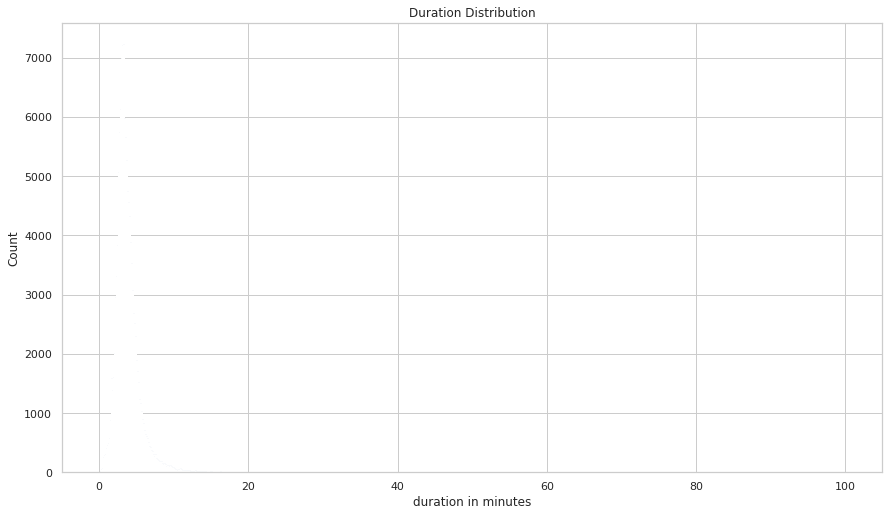

In [204]:
# Check duration distribution
bins = np.arange(0, 100, 0.1)
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = data, x = 'duration_minutes', bins = bins)
plt.title('Duration Distribution')
plt.xlabel('duration in minutes')
plt.ylabel('Count')
plt.show()

In [ ]:
# Look at longest tracks
data.nlargest(5, 'duration_minutes')[['artists', 'name', 'duration_minutes']].set_index('artists')

,name,duration_minutes
artists,,
['Sound Dreamer'],Brown Noise - 90 Minutes,90.058333
['Sounds for Life'],Brown Noise for Sleep,71.167233
"['Lightning, Thunder and Rain Storm']",Midnight Thunderstorm Part 2,71.156783
['Ocean Waves For Sleep'],Ocean Waves for Sleep,68.670967
['One Hour Gulf Coast Ocean Waves'],Natural White Noise for Babies - Ocean Waves f...,68.670967


In [ ]:
# Look at shortest tracks
data.nsmallest(5, 'duration_minutes')[['artists', 'name', 'duration_minutes']].set_index('artists')

,name,duration_minutes
artists,,
['Sarah Vaughan'],Pause Track,0.085133
['Benny Goodman'],Pause Track - Live,0.099850
['Benny Goodman'],Pause Track - Live,0.106033
['Sarah Vaughan'],Pause Track,0.107783
"['Sergei Rachmaninoff', 'Arthur Rubinstein', 'Fritz Reiner']","Rhapsody on a Theme of Paganini, Op. 43: Intro...",0.147550


In [ ]:
# Drop tracks shorter than 1 minute or longer than 12 minutes
indexNames = data[(data['duration_minutes'] < 1)].index
data.drop(indexNames , inplace=True)
indexNames = data[(data['duration_minutes'] > 12)].index
data.drop(indexNames , inplace=True)
data.duration_minutes.describe().transpose()

count    167757.000000
mean          3.768881
std           1.485183
min           1.000000
25%           2.844883
50%           3.460450
75%           4.356883
max          12.000000
Name: duration_minutes, dtype: float64

Drop silent tracks ("pause tracks" sometimes appearing in between tracks in older records)

In [ ]:
data.nsmallest(10, 'loudness')[['artists', 'name','loudness']].set_index('name')


,artists,loudness
name,,
StaggerLee Has His Day at the Beach,['Future Rapper'],-60.000
Hava Nagilah,['Connie Francis'],-60.000
(silent track),['Atlas Fret'],-60.000
Silent Track,['Robert Earl Keen'],-60.000
Magic Window,['Boards of Canada'],-60.000
Empty Field Noise,['Mark Biem'],-54.837
Cabin Sound,['HI-FI CAMP'],-54.376
Brain Relaxation,['Fabricants'],-52.220
Brain X 1000,['Noise Makers'],-51.123


In [ ]:
# Drop silent tracks
indexNames = data[(data['loudness'] < -44)].index
data.drop(indexNames , inplace=True)

Drop older tracks (pre 1945)

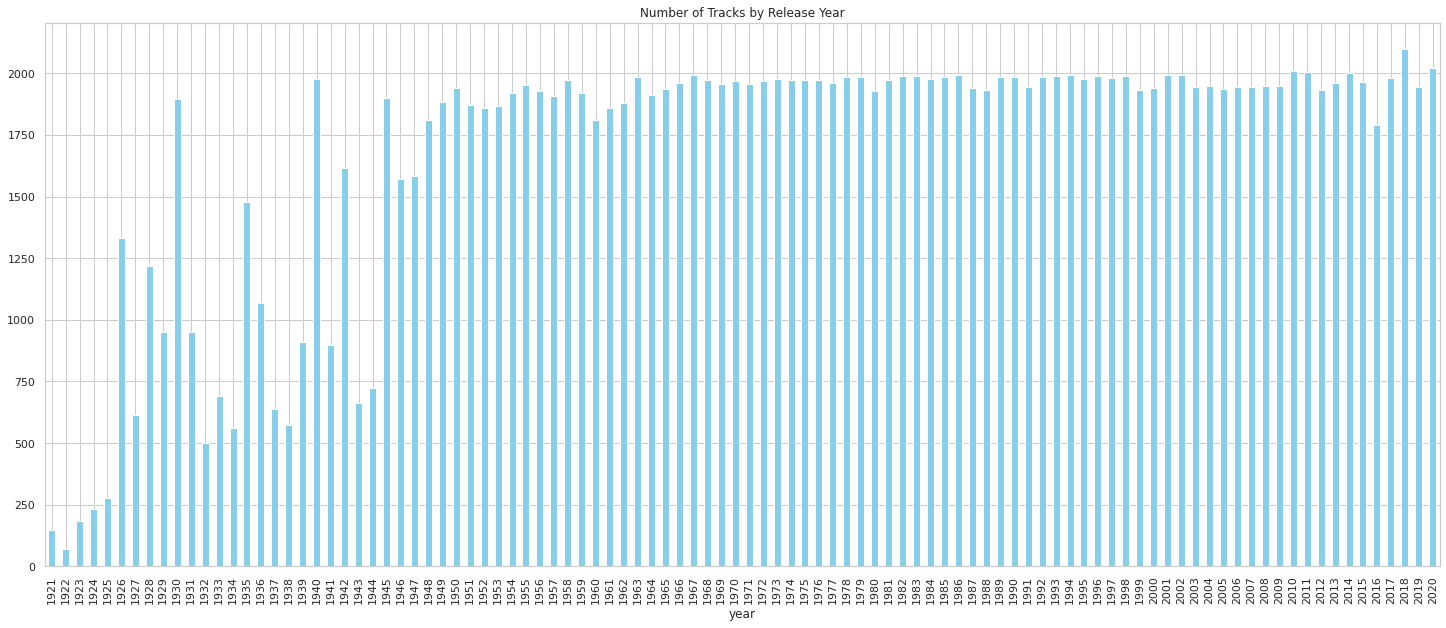

In [ ]:
# Checking distribution of tracks by release year
data.groupby('year')['id'].count().plot(kind = 'bar' , figsize = (25,10), color = 'skyblue' ,title = 'Number of Tracks by Release Year')
# We will drop songs from before 1945

In [ ]:
# Drop tracks released before 1945
indexNames = data[(data['year'] < 1945)].index
data.drop(indexNames , inplace=True)
data.year.describe().transpose()

count    147568.000000
mean       1982.928236
std          21.767657
min        1945.000000
25%        1964.000000
50%        1983.000000
75%        2002.000000
max        2020.000000
Name: year, dtype: float64

# **Looking at the Data**

## Most Recent Track Added

In [ ]:
popular=data[["artists","name","release_date"]]
popular.sort_values(by='release_date', ascending=False).head(1).set_index("name")

,artists,release_date
name,,
Forgive Myself,['Sam Smith'],2020-11-24


## Most Popular Track

In [ ]:
popular=data[["artists","name","popularity"]]
popular.sort_values(by='popularity', ascending=False).head(2).set_index("name")

,artists,popularity
name,,
Dakiti,"['Bad Bunny', 'Jhay Cortez']",100
Mood (feat. iann dior),"['24kGoldn', 'iann dior']",99


https://www.youtube.com/watch?v=TmKh7lAwnBI

## Longest Track

In [ ]:
longest=data[["artists","name","duration_minutes"]]
longest.sort_values(by='duration_minutes', ascending=False).head(1).set_index("name")

,artists,duration_minutes
name,,
Filles de Kilimanjaro,['Miles Davis'],12.0


https://www.youtube.com/watch?v=7hBJ4664bNQ

## Loudest Track

In [ ]:
loudest=data[["artists","name","loudness"]]
loudest.sort_values(by='loudness', ascending=False).head(1).set_index("name")

,artists,loudness
name,,
Your Pretty Face Is Going to Hell - Alternate 'Violent' Iggy Mix,['The Stooges'],3.744


https://www.youtube.com/watch?v=paIwVZfNlAg

## Fastest Track (tempo)

In [ ]:
fastest=data[["artists","name","tempo"]]
fastest.sort_values(by='tempo', ascending=False).head(1).set_index("name")

,artists,tempo
name,,
I Don't Want You on My Mind,['Bill Withers'],243.507


https://www.youtube.com/watch?v=pGL8_-ZOJKM

## Most Acoustic Track

In [ ]:
acoustic=data[["artists","name","acousticness"]]
acoustic.sort_values(by='acousticness', ascending=False).head(1).set_index("name")

,artists,acousticness
name,,
Panghat Mein Na Jaiyo,"['Geeta Dutt', 'Lata Mangeshkar']",0.996


https://www.youtube.com/watch?v=KIsCSAgycxQ

##  Most Danceable Track

In [ ]:
dance=data[["artists","name","danceability"]]
dance.sort_values(by='danceability', ascending=False).head(1).set_index("name")

,artists,danceability
name,,
Funky Cold Medina,['Tone-Loc'],0.988


https://www.youtube.com/watch?v=63ZIf2H9S0E

## Track with Most Energy

In [ ]:
energy_m=data[["artists","name","energy"]]
energy_m.sort_values(by='energy', ascending=False).head(10).set_index("name")

,artists,energy
name,,
Rain Forest and Tropical Beach Sound,['Nature Sounds Nature Music'],1.0
Transilvanian Hunger - Studio,['Darkthrone'],1.0
Under Shelter Rain,['Nataural'],1.0
Ocean For Sleep,['Waves Hard'],1.0
Heavy Rain,['Epic Soundscapes'],1.0
Forest Rain,['Rain Recordings'],1.0
Dripping Rain,['Nataural'],1.0
Steady Forest Rain,['Creatress'],1.0
Moderate Rain,['Rain Sounds ACE'],1.0


https://www.youtube.com/watch?v=KphlVeJX6fE

## Most Positive / Happy Track

In [ ]:
valence_m=data[["artists","name","valence"]]
valence_m.sort_values(by='valence', ascending=False).head(1).set_index("name")

,artists,valence
name,,
Pasito Duranguense,['Montez de Durango'],1.0


https://www.youtube.com/watch?v=-HNiD319DHA

## Most Frequent Song Names

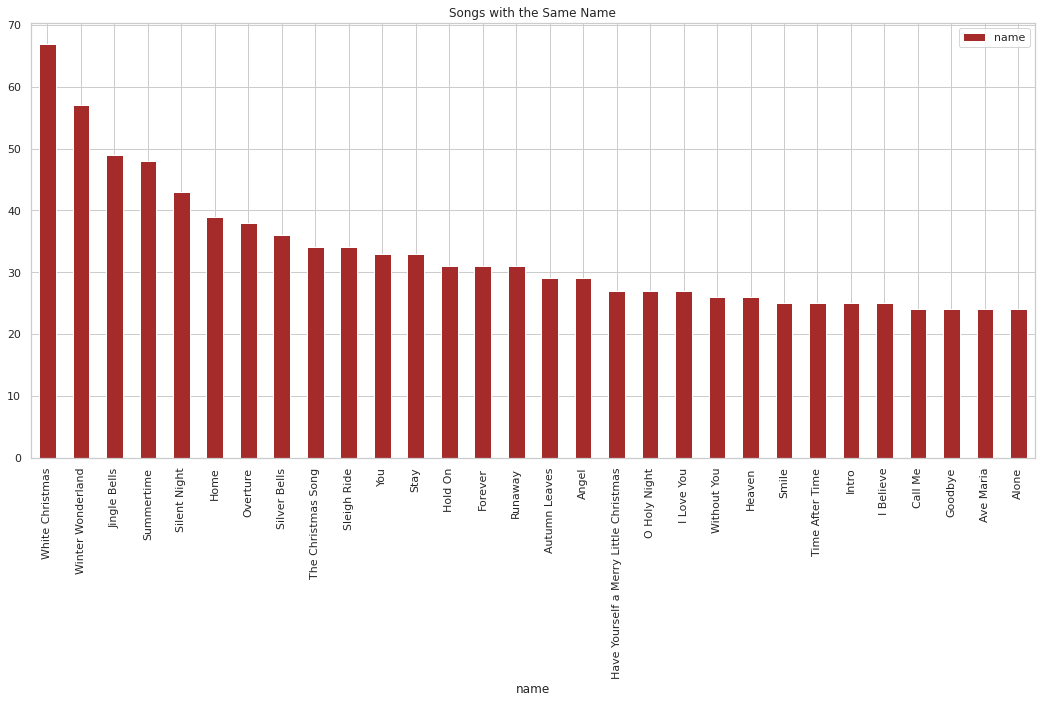

In [ ]:
data.groupby('name')['name'].count().sort_values(ascending = False).to_frame()[: 30].plot(kind = 'bar', figsize = (18,8) , color = 'brown', title = 'Songs with the Same Name')

## Artists with the Most Songs on Spotify

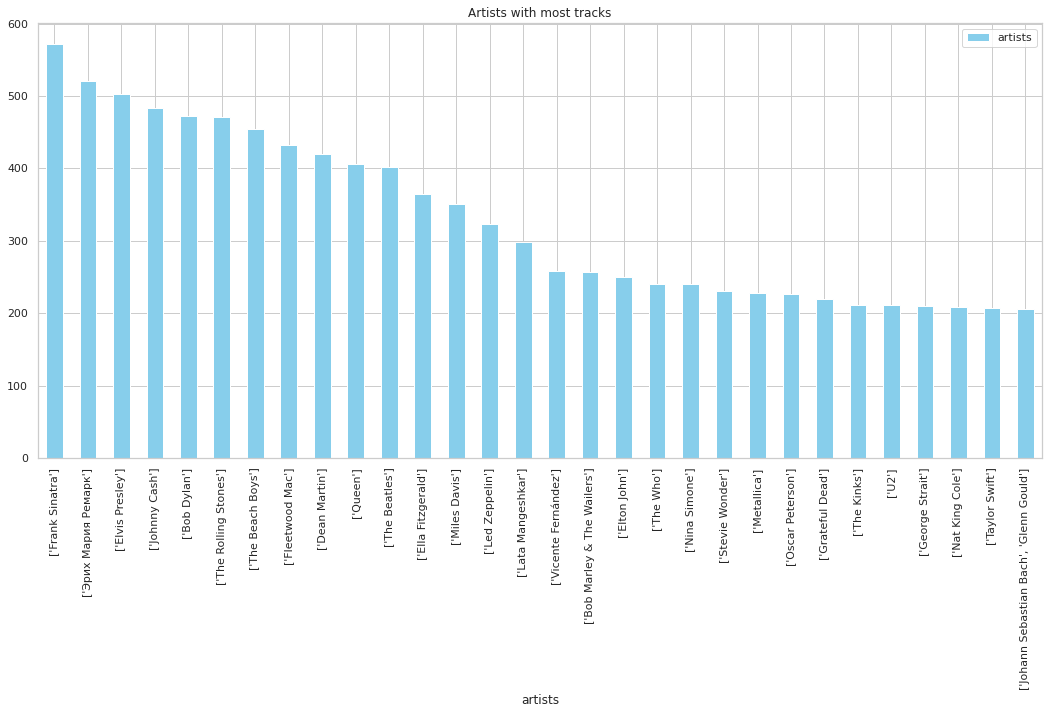

In [ ]:
data.groupby('artists')['artists'].count().sort_values(ascending = False).to_frame()[: 30].plot(kind = 'bar', figsize = (18,8) , color = 'skyblue', title = 'Artists with most tracks')

# **Correlations**

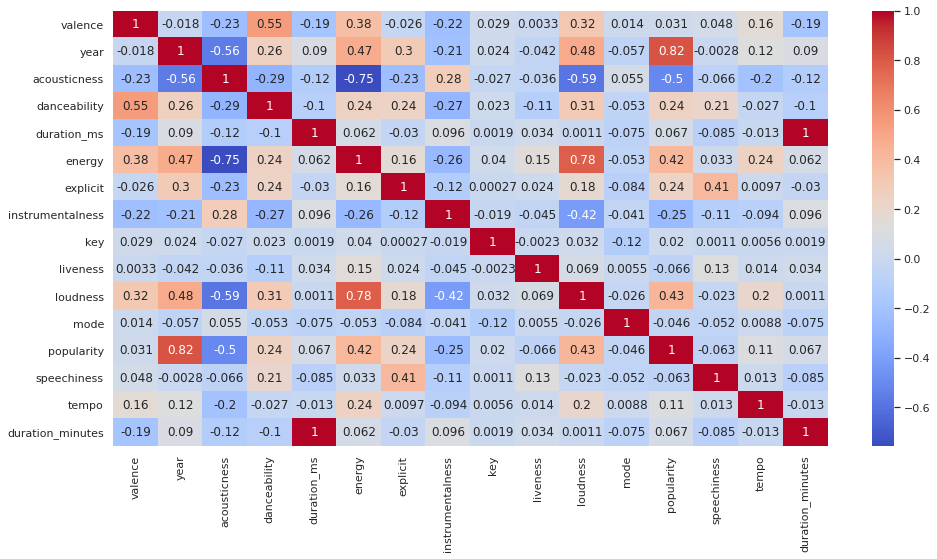

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

What can we learn from the heat map:
1. **Populraity** is correlated with year (this is built into the popularity computation), energy and loudness. Also inversly correlated with acousticness and instrumentalness. 
2. **Valence** ("happy / optimistic vibe of the track) is correlated with energy,  loudness and danceability.
3. **Acousticness** is inversly correlated with energy, loudness and popularity.
4. **Speechiness** and explicit are correlated.

**Recomendation**: To compose a popular song - make it loud, danceable, with a lot of energy. Plug in your guitar or do some electronic stuff (stay away from acoustic playing). Keep the instumental parts to a minimum. Having explicit lyrics will not hurt the popularity.

# **Music Features over the Years**

Text(0.5, 0, 'Year')

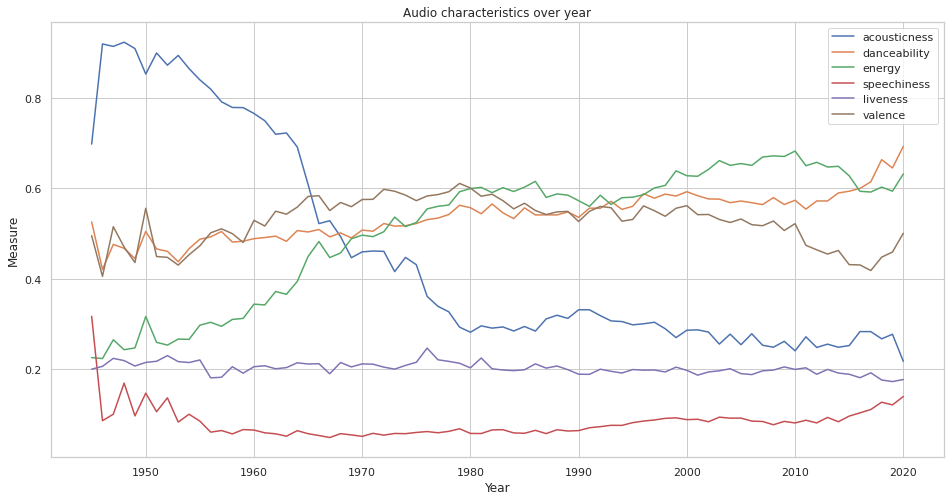

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

# **"Top 10 by Your Favorite Artist" Finder** 
Find the top 10 most popular songs of **your** favorite artist

In [ ]:
artists_x=data
artists_x["artists"] = data.artists.apply(lambda x:x.replace("[","").replace("]","").replace("'","").split(","))
artists_x = data.explode('artists')

Whos is your favorite artist / band?  Metallica
Top 10 most popular tracks by Metallica 


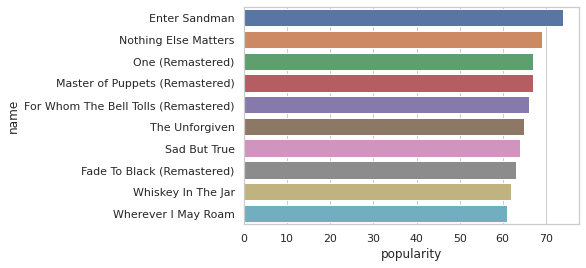

In [207]:
loop="y"
while loop=="y" or loop=="yes" or loop=="Y":
  fav=input("Whos is your favorite artist / band?  ")
  fav_results = artists_x[artists_x["artists"]==fav].sort_values("popularity",ascending=False).head(10)
  try:
    sns.barplot(x="popularity", y="name", data=fav_results,ci=None)   
  except:
    print("Sorry, no data for this artist")
    loop=input("Try again? (y/n):")
  else:
    break
if (loop=="y"):
  print(f"Top 10 most popular tracks by {fav} ")
  sns.barplot(x="popularity", y="name", data=fav_results,ci=None)

### Most popular tracks sung by common lead singer
Had to do this manually - example for Chris Cornell (combine 4 artists: Chris Cornell, Soundgarden, Audioslave and Temple of the Dog) 

To do this for all tracks we need to combine this dataset eith a database of band members in each song and their roles ("lead singer", "bassist", "lead guitar", "drums")

In [ ]:
chris = artists_x.loc[(artists_x['artists'] == 'Chris Cornell') | (artists_x['artists'] == 'Soundgarden') | (artists_x['artists'] == 'Audioslave') | (artists_x['artists'] == 'Temple of the Dog')]
print(chris.shape)
chris.set_index('artists').nlargest(10, 'popularity')[['name', 'year','popularity']]

(92, 20)


,name,year,popularity
artists,,,
Audioslave,Like a Stone,2002,77
Soundgarden,Black Hole Sun,1994,76
Audioslave,Show Me How to Live,2002,71
Audioslave,Be Yourself,2005,70
Soundgarden,Spoonman,1994,68
Audioslave,Cochise,2002,68
Audioslave,I Am the Highway,2002,67
Soundgarden,Fell On Black Days,1994,66
Audioslave,Doesn't Remind Me,2005,65


# **Focus on 2020 Tracks**

## Top 10 Tracks by Popularity (2020)

In [ ]:
data_2020=data[(data['year'] == 2020)]
data_2020.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_minutes
19606,0.756,2020,0.2210,"[24kGoldn, iann dior]",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),99,2020-07-24,0.0369,90.989,2.342100
19607,0.347,2020,0.1140,"[Pop Smoke, Lil Baby, DaBaby]",0.823,190476,0.586,1,0PvFJmanyNQMseIFrU708S,0.000000,6,0.1930,-6.606,0,For The Night (feat. Lil Baby & DaBaby),95,2020-07-03,0.2000,125.971,3.174600
19608,0.357,2020,0.0194,"[Cardi B, Megan Thee Stallion]",0.935,187541,0.454,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,2020-08-07,0.3750,133.073,3.125683
19609,0.522,2020,0.2440,"[Drake, Lil Durk]",0.761,261493,0.518,1,2SAqBLGA283SUiwJ3xOUVI,0.000035,0,0.1070,-8.871,1,Laugh Now Cry Later (feat. Lil Durk),93,2020-08-14,0.1340,133.976,4.358217
19610,0.682,2020,0.4680,[Ariana Grande],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,2.872083


In [ ]:
data_2020.set_index('name').nlargest(10, 'popularity')[['artists', 'popularity']]

,artists,popularity
name,,
Dakiti,"[Bad Bunny, Jhay Cortez]",100
Mood (feat. iann dior),"[24kGoldn, iann dior]",99
Dynamite,[BTS],97
WAP (feat. Megan Thee Stallion),"[Cardi B, Megan Thee Stallion]",96
positions,[Ariana Grande],96
What You Know Bout Love,[Pop Smoke],96
Blinding Lights,[The Weeknd],96
For The Night (feat. Lil Baby & DaBaby),"[Pop Smoke, Lil Baby, DaBaby]",95
Holy (feat. Chance The Rapper),"[Justin Bieber, Chance the Rapper]",95


## Top 10 Releasing Artists of 2020

In [ ]:
# data_2020.groupby('artists')['id'].count().sort_values(ascending = False).to_frame()[: 10].plot(kind = 'bar' , figsize = (10,5), color = 'grey' ,title = 'Top 10 Releasing Artists of 2020')

## Top 10 Artists by Average Popularity (2020)

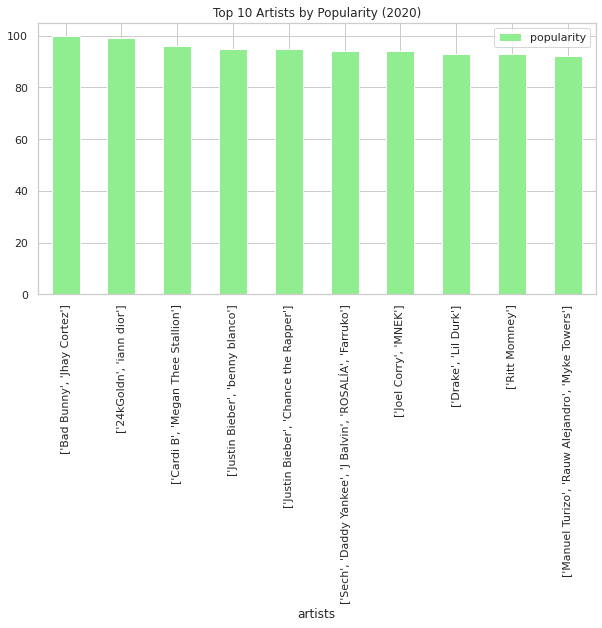

In [ ]:
data_2020.groupby('artists')['popularity'].mean().sort_values(ascending = False).to_frame()[: 10].plot(kind = 'bar', figsize = (10,5) , color = 'lightgreen', title = 'Top 10 Artists by Popularity (2020)')

# **Scale Analysis**

In [ ]:
# Adding column with real values of key and mode (instead of code)
data['real_mode'] = np.where(data['mode']== 0, 'Minor', 'Major')
conditions = [
    (data['key'] == 0),
    (data['key'] == 1),
    (data['key'] == 2),
    (data['key'] == 3),
    (data['key'] == 4),
    (data['key'] == 5),
    (data['key'] == 6),
    (data['key'] == 7),
    (data['key'] == 8),
    (data['key'] == 9),
    (data['key'] == 10),
    (data['key'] == 11)
    ]
values = ["C","C♯","D","D♯","E","F","F♯","G","G♯","A","A♯","B"]
data['real_key'] = np.select(conditions, values)

In [ ]:
# Adding column with feature "scale" (key + mode)
data["scale"] = data["real_key"] + str(" ")+ data["real_mode"]

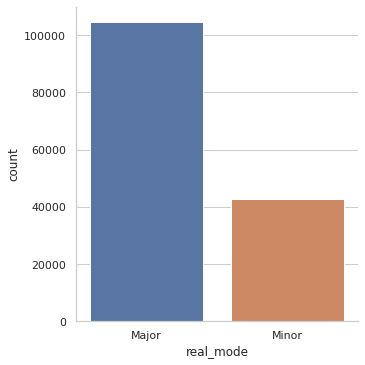

In [ ]:
sns.catplot(x="real_mode", kind="count", data=data)

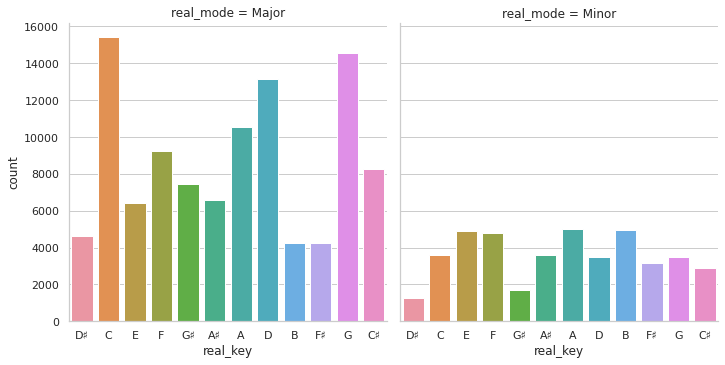

In [ ]:
sns.catplot(x="real_key", kind="count", col='real_mode', data=data)

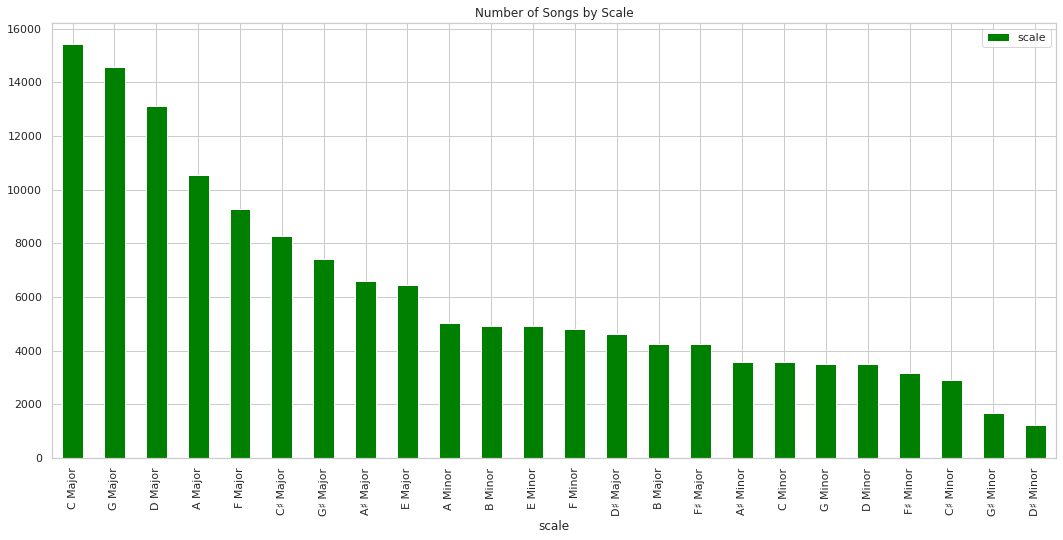

In [ ]:
data.groupby('scale')['scale'].count().sort_values(ascending = False).to_frame()[: 30].plot(kind = 'bar', figsize = (18,8) , color = 'green', title = 'Number of Songs by Scale')

**Hypothesis Testing**

Determine whether the differences between group means are statistically significant

H₀: μ₁ (major scale) = μ₂ (minor scale) - There is no difference between the popularity  of the minor and major songs

H₁: There is a difference

α = 0.05

In [ ]:
minor_df=data.loc[data['mode'] == 0]
minor_pop=minor_df["popularity"]

major_df=data.loc[data['mode'] == 1]
major_pop=major_df["popularity"]

In [ ]:
major_pop.describe()

In [ ]:
minor_pop.describe()

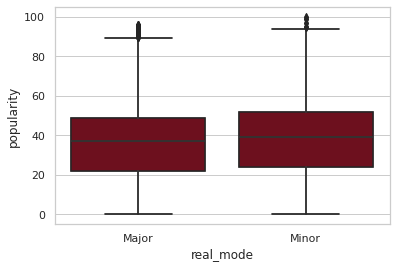

In [ ]:
ax = sns.boxplot(x='real_mode', y='popularity', data=data, color='#99c2a2')
ax = sns.boxplot(x="real_mode", y="popularity", data=data, color='#7d0013')
plt.show()

In [ ]:
#perform one-way ANOVA
f_oneway(minor_pop, major_pop)

F_onewayResult(statistic=318.66578585796543, pvalue=3.3620125825713154e-71)

**Interpretation**:

Since the p-value is less than .05, we reject the null hypothesis. 
This means that there is a difference in exam scores among the two groups in terms of popularity.

# **Analysis According to Genres**

This analysis uses the file data_by_genres.csv which contains the averages of the features according to genres. In the file there are over 2,900 different genres and sub-genres, and an individual track ,ay have more than one genre. 

In [ ]:
data_by_genres.describe().transpose()

In [ ]:
data_by_genres.sort_values('popularity').tail(25)
#data_by_genres.head(10)

## **Charecteristics of Different Genres**

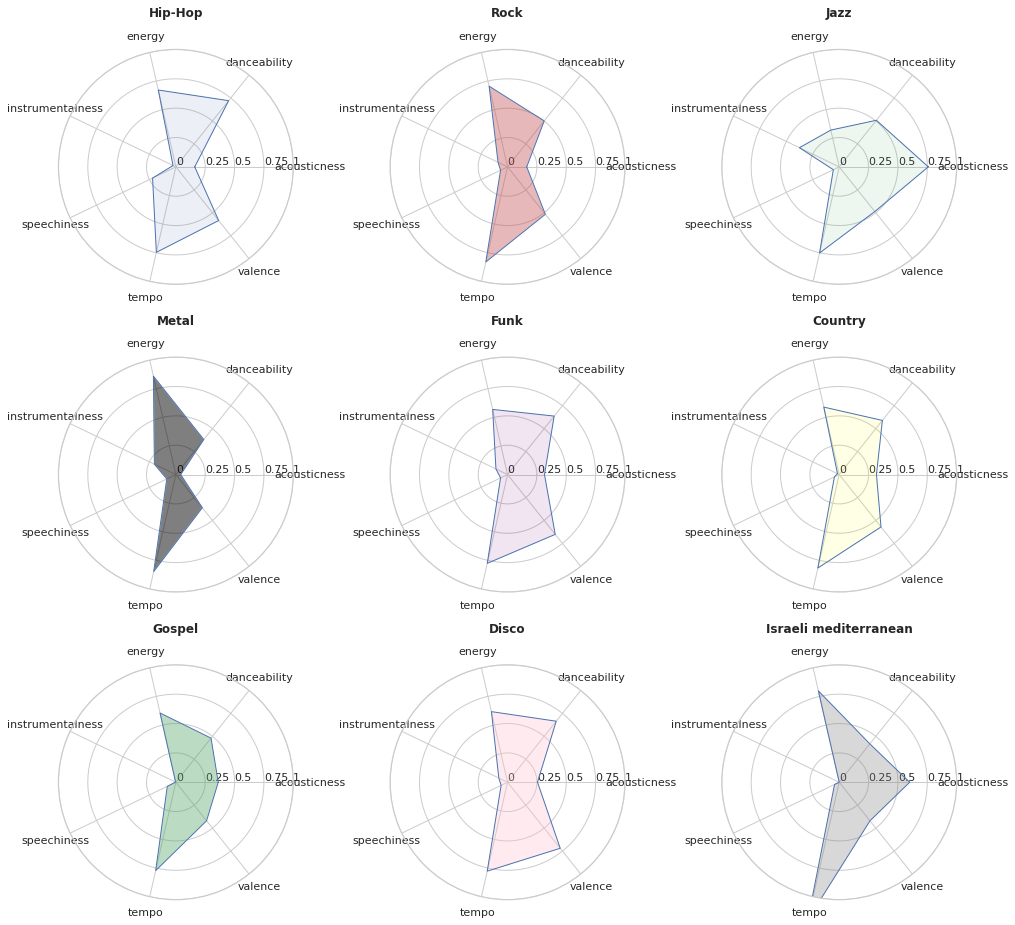

In [ ]:
# plotting spider graph for genres:

# Set data
df = data_by_genres.copy(deep = True)
df.drop(columns=['key','loudness','duration_ms','mode','liveness','popularity'], inplace=True)
df.tempo /= 150

df_hiphop = df[df.index == 'hip hop']
df_rock = df[df.index == 'rock']
df_jazz = df[df.index == 'jazz']
df_metal = df[df.index == 'metal']
df_funk = df[df.index == 'funk']
df_country = df[df.index == 'country']
df_gospel = df[df.index == 'gospel']
df_disco = df[df.index == 'disco']
df_israeli = df[df.index == 'israeli mediterranean']

# number of variable
categories=list(df)[0:]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values_hiphop=df_hiphop.values.flatten().tolist()
values_hiphop += values_hiphop[:1]
values_rock=df_rock.values.flatten().tolist()
values_rock += values_rock[:1]
values_jazz=df_jazz.values.flatten().tolist()
values_jazz += values_jazz[:1]
values_metal=df_metal.values.flatten().tolist()
values_metal += values_metal[:1]
values_funk=df_funk.values.flatten().tolist()
values_funk += values_funk[:1]
values_country=df_country.values.flatten().tolist()
values_country += values_country[:1]
values_gospel=df_gospel.values.flatten().tolist()
values_gospel += values_gospel[:1]
values_disco=df_disco.values.flatten().tolist()
values_disco += values_disco[:1]
values_israeli=df_israeli.values.flatten().tolist()
values_israeli += values_israeli[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig , ((ax, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(ncols = 3, nrows = 3,sharex='row', figsize=(14, 13), subplot_kw=dict(projection='polar'))

# Naming each plots' title
ax.set_title('Hip-Hop\n',fontweight="bold") 
ax2.set_title('Rock\n',fontweight="bold")
ax3.set_title('Jazz\n',fontweight="bold")
ax4.set_title('Metal\n',fontweight="bold")
ax5.set_title('Funk\n',fontweight="bold")
ax6.set_title('Country\n',fontweight="bold")
ax7.set_title('Gospel\n',fontweight="bold")
ax8.set_title('Disco\n',fontweight="bold")
ax9.set_title('Israeli mediterranean\n',fontweight="bold")


# Setting angular position 
ax.set_rlabel_position(0)
ax2.set_rlabel_position(0)
ax3.set_rlabel_position(0)
ax4.set_rlabel_position(0)
ax5.set_rlabel_position(0)
ax6.set_rlabel_position(0)
ax7.set_rlabel_position(0)
ax8.set_rlabel_position(0)
ax9.set_rlabel_position(0)

# Setting axes labels and limits
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0,1)
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels(["0","0.25","0.5","0.75","1"])
ax4.set_xticks(angles[:-1])
ax4.set_xticklabels(categories)
ax4.set_ylim(0,1)
ax4.set_yticks([0,0.25,0.5,0.75,1])
ax4.set_yticklabels(["0","0.25","0.5","0.75","1"])
ax7.set_xticks(angles[:-1])
ax7.set_xticklabels(categories)
ax7.set_ylim(0,1)
ax7.set_yticks([0,0.25,0.5,0.75,1])
ax7.set_yticklabels(["0","0.25","0.5","0.75","1"])
ax2.set_ylim(0,1)
ax2.set_yticks([0,0.25,0.5,0.75,1])
ax2.set_yticklabels(["0","0.25","0.5","0.75","1"])
ax3.set_ylim(0,1)
ax3.set_yticks([0,0.25,0.5,0.75,1])
ax3.set_yticklabels(["0","0.25","0.5","0.75","1"])
ax5.set_ylim(0,1)
ax5.set_yticks([0,0.25,0.5,0.75,1])
ax5.set_yticklabels(["0","0.25","0.5","0.75","1"])
ax6.set_ylim(0,1)
ax6.set_yticks([0,0.25,0.5,0.75,1])
ax6.set_yticklabels(["0","0.25","0.5","0.75","1"])
ax8.set_ylim(0,1)
ax8.set_yticks([0,0.25,0.5,0.75,1])
ax8.set_yticklabels(["0","0.25","0.5","0.75","1"])
ax9.set_ylim(0,1)
ax9.set_yticks([0,0.25,0.5,0.75,1])
ax9.set_yticklabels(["0","0.25","0.5","0.75","1"])


# Plot data
ax.plot(angles, values_hiphop, linewidth=1, linestyle='solid')
ax2.plot(angles, values_rock, linewidth=1, linestyle='solid')
ax3.plot(angles, values_jazz, linewidth=1, linestyle='solid')
ax4.plot(angles, values_metal, linewidth=1, linestyle='solid')
ax5.plot(angles, values_funk, linewidth=1, linestyle='solid')
ax6.plot(angles, values_country, linewidth=1, linestyle='solid')
ax7.plot(angles, values_gospel, linewidth=1, linestyle='solid')
ax8.plot(angles, values_disco, linewidth=1, linestyle='solid')
ax9.plot(angles, values_israeli, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values_hiphop, 'b', alpha=0.1)
ax2.fill(angles, values_rock, 'r', alpha=0.4)
ax3.fill(angles, values_jazz, 'g', alpha=0.1)
ax4.fill(angles, values_metal, 'black', alpha=0.5)
ax5.fill(angles, values_funk, 'purple', alpha=0.1)
ax6.fill(angles, values_country, 'yellow', alpha=0.1)
ax7.fill(angles, values_gospel, 'g', alpha=0.4)
ax8.fill(angles, values_disco, 'pink', alpha=0.3)
ax9.fill(angles, values_israeli, 'grey', alpha=0.3)

# Show the graph
fig.tight_layout()



## **Differences between Decades**

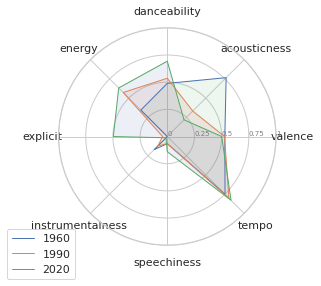

In [ ]:
# plotting spider charts by years : 1960, 1990, 2020
# Set data
df2 = data.copy(deep = True)
df2.drop(columns=['key','name','loudness','duration_ms','mode','liveness',
                  'popularity','release_date','artists','id','duration_minutes'], inplace=True)
df2.tempo /= 150

df2 = df2.groupby('year').mean()
df2.head()

df_60 = df2[df2.index == 1960]
df_90 = df2[df2.index == 1990]
df_2020 = df2[df2.index == 2020]


# number of variable
categories=list(df2)[0:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


# Initialise the spider plot
axx = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
axx.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,0.75,1], ["0","0.25","0.5","0.75","1"], color="grey", size=7)
plt.ylim(0,1)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values_60=df_60.values.flatten().tolist()
values_60 += values_60[:1]
axx.plot(angles, values_60, linewidth=1, linestyle='solid', label="1960")
axx.fill(angles, values_60, 'g', alpha=0.1)

values_90=df_90.values.flatten().tolist()
values_90 += values_90[:1]
axx.plot(angles, values_90, linewidth=1, linestyle='solid', label="1990")
axx.fill(angles, values_90, 'r', alpha=0.1)

values_2020=df_2020.values.flatten().tolist()
values_2020 += values_2020[:1]
axx.plot(angles, values_2020, linewidth=1, linestyle='solid', label="2020")
axx.fill(angles, values_2020, 'b', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

## **END**